In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datasets/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df["gender"].count()

1000

In [6]:
df["race/ethnicity"].value_counts() #kaç farklı grup var

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [7]:
df["parental level of education"].unique() #kaç farklı education türü var?

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [8]:
df.groupby("parental level of education")["gender"].count()

parental level of education
associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
Name: gender, dtype: int64

In [9]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [10]:
df.nunique() #sütunların içinde kaç farklı tür var

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


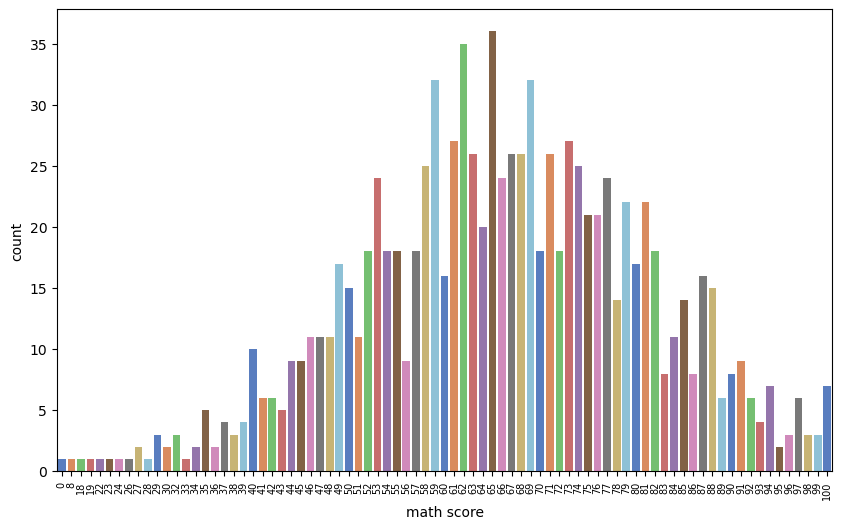

In [12]:
plt.figure(figsize=(10, 6))
p = sns.countplot(x="math score",data = df, palette="muted")
plt.xticks(rotation=90,fontsize=7)
plt.show()

In [13]:
passmark = 50    #50 den düşük alanlar F yüksek alanlar P
df["Math_PassStatus"] = np.where(df["math score"] < passmark,"F","P")
df.Math_PassStatus.value_counts()

P    865
F    135
Name: Math_PassStatus, dtype: int64

In [14]:
df[df["Math_PassStatus"] == "F"].iloc[0]

gender                                       male
race/ethnicity                            group A
parental level of education    associate's degree
lunch                                free/reduced
test preparation course                      none
math score                                     47
reading score                                  57
writing score                                  44
Math_PassStatus                                 F
Name: 3, dtype: object

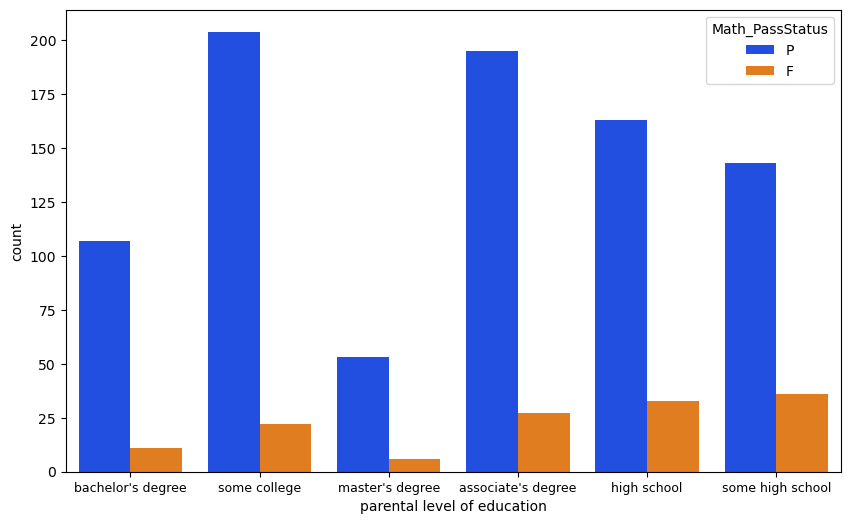

In [15]:
plt.figure(figsize=(10, 6))
p = sns.countplot(x="parental level of education",data = df,hue="Math_PassStatus", palette="bright")
plt.xticks(rotation=0,fontsize=9)
plt.show()

In [16]:
df["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [17]:
bachelorcount = df[df["parental level of education"] == "bachelor's degree"]["Math_PassStatus" ].count()
bachelorcount   #toplam veren kod

118

In [18]:
bacpassdf = df[(df["parental level of education"] == "bachelor's degree") & (df["Math_PassStatus"] == "P")].shape[0]
bacpassdf  #bachelors degree passed öğrenci sayısı

107

In [19]:
bacfaildf = df[(df["parental level of education"] == "bachelor's degree") & (df["Math_PassStatus"] == "F")].shape[0]
bacfaildf  #bachelors degree failed öğrenci sayısı

11

In [20]:
bachelor = bacpassdf/bacfaildf
print("Bachelor's Degree: {:.2f}".format(bachelor))

Bachelor's Degree: 9.73


In [21]:
somcount = df[df["parental level of education"] == "some college"]["Math_PassStatus" ].count()
somcount
sompassdf = df[(df["parental level of education"] == "some college") & (df["Math_PassStatus"] == "P")].shape[0]
sompassdf  #bachelors degree passed öğrenci sayısı
somfaildf = df[(df["parental level of education"] == "some college") & (df["Math_PassStatus"] == "F")].shape[0]
somfaildf  #bachelors degree failed öğrenci sayısı
some = sompassdf/somfaildf
print("Some College: {:.2f}".format(some))

Some College: 9.27


In [22]:
mastcount = df[df["parental level of education"] == "master's degree"]["Math_PassStatus" ].count()
mastcount
mastpassdf = df[(df["parental level of education"] == "master's degree") & (df["Math_PassStatus"] == "P")].shape[0]
mastpassdf  #bachelors degree passed öğrenci sayısı
mastfaildf = df[(df["parental level of education"] == "master's degree") & (df["Math_PassStatus"] == "F")].shape[0]
mastfaildf  #bachelors degree failed öğrenci sayısı
master = mastpassdf/mastfaildf
print("master's degree: {:.2f}".format(master))

master's degree: 8.83


In [23]:
asscount = df[df["parental level of education"] == "associate's degree"]["Math_PassStatus" ].count()
asscount
asspassdf = df[(df["parental level of education"] == "associate's degree") & (df["Math_PassStatus"] == "P")].shape[0]
asspassdf  #bachelors degree passed öğrenci sayısı
assfaildf = df[(df["parental level of education"] == "associate's degree") & (df["Math_PassStatus"] == "F")].shape[0]
assfaildf  #bachelors degree failed öğrenci sayısı
asso = asspassdf/assfaildf
print("associate's degree: {:.2f}".format(asso))

associate's degree: 7.22


In [24]:
higcount = df[df["parental level of education"] == "high school"]["Math_PassStatus" ].count()
higcount
higpassdf = df[(df["parental level of education"] == "high school") & (df["Math_PassStatus"] == "P")].shape[0]
higpassdf  #bachelors degree passed öğrenci sayısı
higfaildf = df[(df["parental level of education"] == "high school") & (df["Math_PassStatus"] == "F")].shape[0]
higfaildf  #bachelors degree failed öğrenci sayısı
high = higpassdf/higfaildf
print("High School: {:.2f}".format(high))

High School: 4.94


In [25]:
shigcount = df[df["parental level of education"] == "some high school"]["Math_PassStatus" ].count()
shigcount
shigpassdf = df[(df["parental level of education"] == "some high school") & (df["Math_PassStatus"] == "P")].shape[0]
shigpassdf  #bachelors degree passed öğrenci sayısı
shigfaildf = df[(df["parental level of education"] == "some high school") & (df["Math_PassStatus"] == "F")].shape[0]
shigfaildf  #bachelors degree failed öğrenci sayısı
shigh = shigpassdf/shigfaildf
print("Some High School: {:.2f}".format(shigh))

Some High School: 3.97


In [26]:
print("Bachelor's Degree: {:.2f}".format(bachelor))
print("Some College: {:.2f}".format(some))
print("master's degree: {:.2f}".format(master))
print("associate's degree: {:.2f}".format(asso))
print("High School: {:.2f}".format(high))
print("Some High School: {:.2f}".format(shigh))

Bachelor's Degree: 9.73
Some College: 9.27
master's degree: 8.83
associate's degree: 7.22
High School: 4.94
Some High School: 3.97


In [27]:
print("Math Score")
bachelorss =  (bacpassdf/bachelorcount) * 100
print("Bachelor's Degree Başarı Oranı: {:.2f}".format(bachelorss))

someh =  (sompassdf/somcount) * 100
print("Some College Başarı Oranı: {:.2f}".format(someh))

maste =  (mastpassdf/mastcount) * 100
print("master's Degree Başarı Oranı: {:.2f}".format(maste))

associ =  (asspassdf/asscount) * 100
print("Associate's Degree Başarı Oranı: {:.2f}".format(associ))

highs =  (higpassdf/higcount) * 100
print("High School Başarı Oranı: {:.2f}".format(highs))

somhighs =  (shigpassdf/shigcount) * 100
print("Some High School Başarı Oranı: {:.2f}".format(somhighs))

Math Score
Bachelor's Degree Başarı Oranı: 90.68
Some College Başarı Oranı: 90.27
master's Degree Başarı Oranı: 89.83
Associate's Degree Başarı Oranı: 87.84
High School Başarı Oranı: 83.16
Some High School Başarı Oranı: 79.89


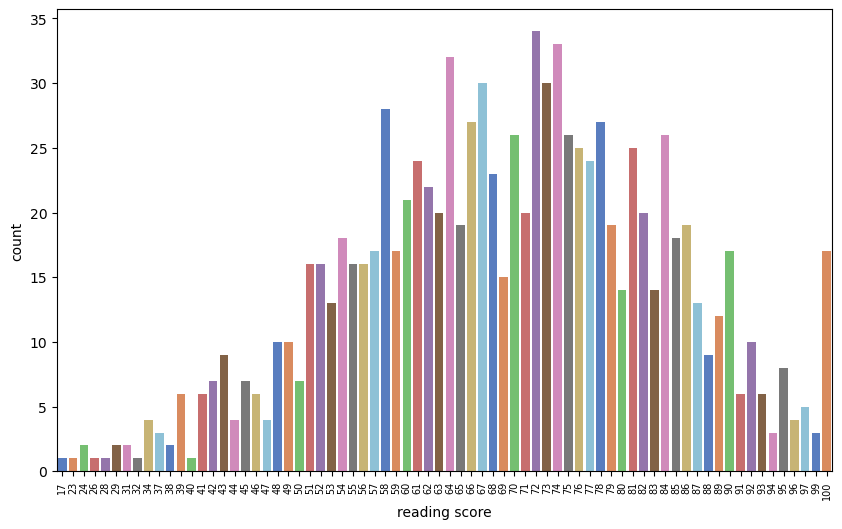

In [28]:
plt.figure(figsize=(10, 6))
p = sns.countplot(x="reading score",data = df, palette="muted")
plt.xticks(rotation=90,fontsize=7)
plt.show()

In [29]:
passmark = 50    #50 den düşük alanlar F yüksek alanlar P
df["Reading_PassStatus"] = np.where(df["reading score"] < passmark,"F","P")
df.Reading_PassStatus.value_counts()

P    910
F     90
Name: Reading_PassStatus, dtype: int64

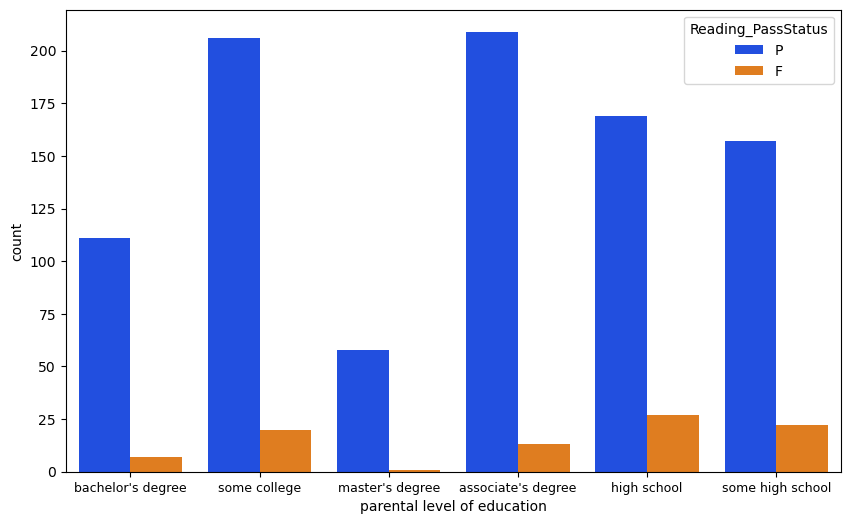

In [30]:
plt.figure(figsize=(10, 6))
p = sns.countplot(x="parental level of education",data = df,hue="Reading_PassStatus", palette="bright")
plt.xticks(rotation=0,fontsize=9)
plt.show()

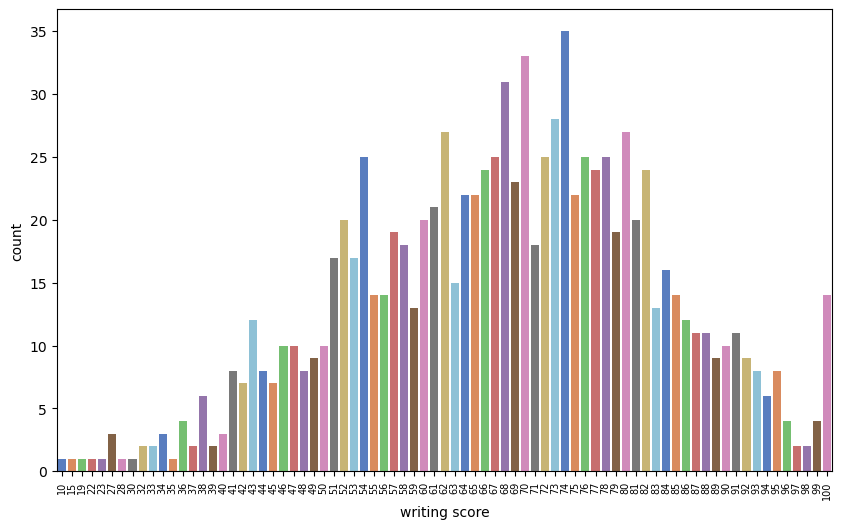

In [31]:
plt.figure(figsize=(10, 6))
p = sns.countplot(x="writing score",data = df, palette="muted")
plt.xticks(rotation=90,fontsize=7)
plt.show()

In [32]:
passmark = 50    #50 den düşük alanlar F yüksek alanlar P
df["Writing_PassStatus"] = np.where(df["writing score"] < passmark,"F","P")
df.Writing_PassStatus.value_counts()

P    886
F    114
Name: Writing_PassStatus, dtype: int64

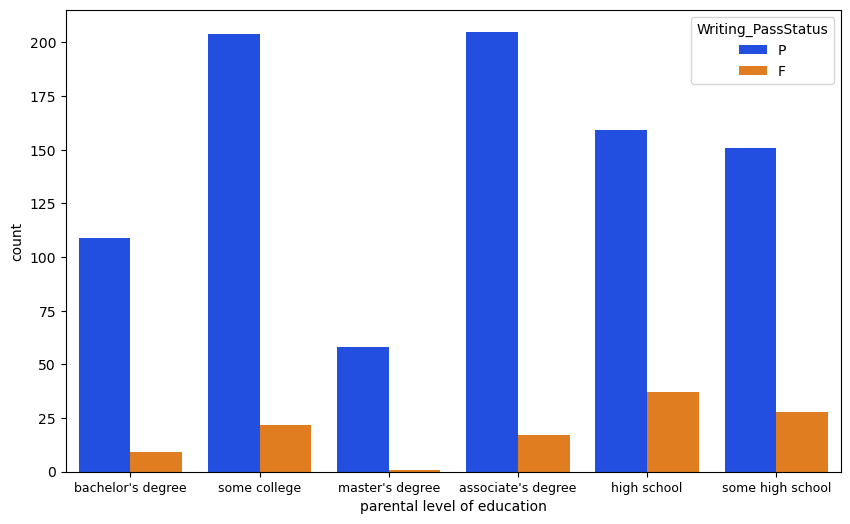

In [33]:
plt.figure(figsize=(10, 6))
p = sns.countplot(x="parental level of education",data = df,hue="Writing_PassStatus", palette="bright")
plt.xticks(rotation=0,fontsize=9)
plt.show()

In [34]:
masttpassdf = df[(df["parental level of education"] == "master's degree") & (df["Writing_PassStatus"] == "P")].shape[0]
masttpassdf  #masters degree passed öğrenci sayısı
masttfaildf = df[(df["parental level of education"] == "master's degree") & (df["Writing_PassStatus"] == "F")].shape[0]
masttfaildf  #masters degree failed öğrenci sayısı
print(masttpassdf,masttfaildf) #58 P 1 F

58 1


In [35]:
masttcount = df[df["parental level of education"] == "master's degree"]["Writing_PassStatus" ].count()
masttcount   # Toplam 59 kişi

59

In [36]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P


In [37]:
df["Overall_PassStatus"] = df.apply(lambda x: "F" if x["Math_PassStatus"] == "F" or x["Reading_PassStatus"] == "F" or
                                     x["Reading_PassStatus"] == "F" else "P",axis=1)
df.Overall_PassStatus.value_counts()  #3 derstende başarılı olanların toplam sayısı P
# herhangi bir dersten F alanların overallscore'u F

P    834
F    166
Name: Overall_PassStatus, dtype: int64

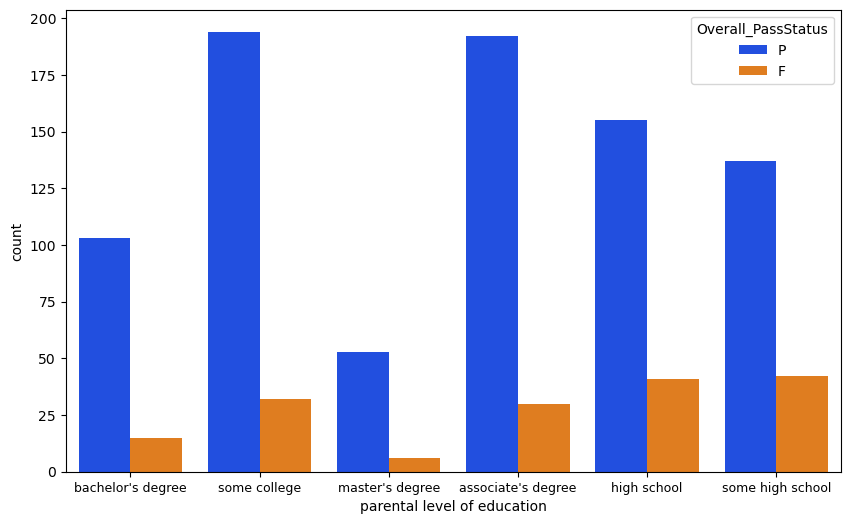

In [38]:
plt.figure(figsize=(10, 6))
p = sns.countplot(x="parental level of education",data = df,hue="Overall_PassStatus", palette="bright")
plt.xticks(rotation=0,fontsize=9)
plt.show()

In [39]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,Overall_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P


In [62]:
df["Total_Marks"] = (df["math score"] + df["reading score"] + df["writing score"]) / (3)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,Overall_PassStatus,Total_Marks
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,72.666667
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,82.333333
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,P,F,F,49.333333
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,76.333333


In [63]:
df['Total_Marks'] = df['Total_Marks'].round(2)  # virgülden sonra 2 basamak görünüyor
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,Overall_PassStatus,Total_Marks
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,72.67
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,82.33


In [61]:
df['Total_Marks'] = df['Total_Marks'].round(0).astype(int)  # burada tamsayı olarak görünüyor float türünü int'ye çevirdik
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,Overall_PassStatus,Total_Marks
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,73
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,82


In [64]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
Math_PassStatus                 object
Reading_PassStatus              object
Writing_PassStatus              object
Overall_PassStatus              object
Total_Marks                    float64
dtype: object

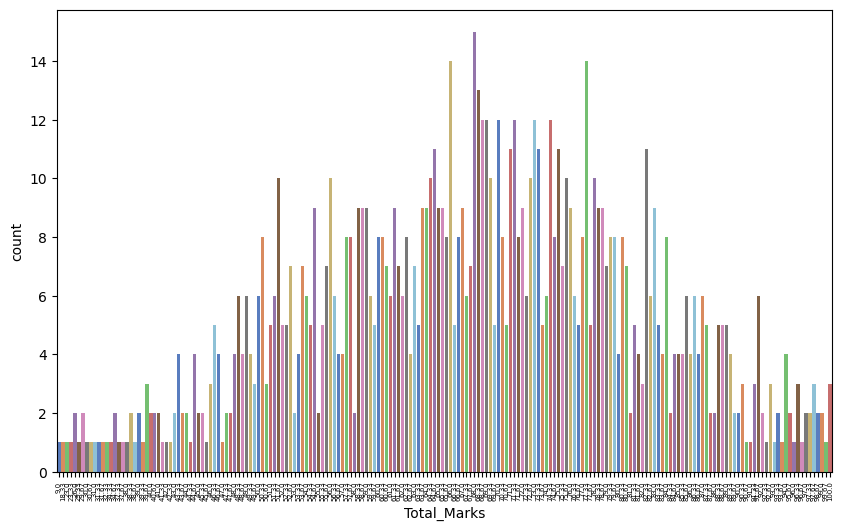

In [66]:
plt.figure(figsize=(10, 6))
p = sns.countplot(x="Total_Marks",data = df, palette="muted")
plt.xticks(rotation=90,fontsize=5)
plt.show()

In [70]:
df["Total_Marks"].mean().round(2)  #notların ortalaması

67.77

In [112]:
def GetGrade(Total_Marks,Overall_PassStatus):
    if(Overall_PassStatus == "F"):
        return "F"
    if(Total_Marks >= 80):
        return "A"
    if(Total_Marks >= 70):
        return "B"
    if(Total_Marks >= 60):
        return "C"
    if(Total_Marks >= 50):
        return "D"
    if(Total_Marks >= 40):
        return "E"
    else:
        return "F"
df["Grade"] = df.apply(lambda x: GetGrade(x["Total_Marks"],x["Overall_PassStatus"]),axis=1)
df.Grade.value_counts()

#Grade sütununu oluşturup Harf notları verdik

B    261
C    255
A    198
F    166
D    116
E      4
Name: Grade, dtype: int64

In [113]:
df[df["Grade"] == "E"] #Grade E olanlar

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,Overall_PassStatus,Total_Marks,Grade
136,male,group B,some high school,standard,completed,51,54,41,P,P,F,P,48.67,E
182,female,group E,high school,standard,none,50,50,47,P,P,F,P,49.00,E
280,male,group D,high school,standard,none,53,52,42,P,P,F,P,49.00,E
307,male,group C,some high school,standard,none,51,52,44,P,P,F,P,49.00,E


In [122]:
df[df["Grade"] == "E"]["parental level of education"] #Grade E olanların aile eğitim durumları

136    some high school
182         high school
280         high school
307    some high school
Name: parental level of education, dtype: object

In [120]:
df[(df["Grade"] == "A") & (df["parental level of education"] == "master's degree")].count().iloc[0] 
#Grade A olan öğrencilerden kaç tanesinin aile eğitim durumu masters degree 
#Toplam 198 öğrenci A, 20 tanesi masters degree

20

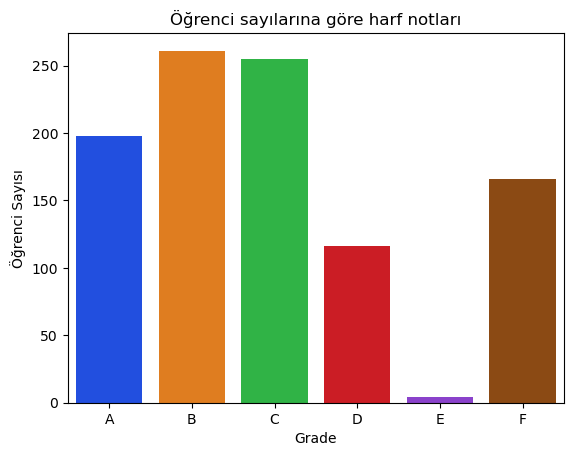

In [130]:
sns.countplot(x="Grade",data=df,order=["A","B","C","D","E","F"], palette="bright")
plt.xlabel("Grade")
plt.ylabel("Öğrenci Sayısı")
plt.title("Öğrenci sayılarına göre harf notları")
plt.show()

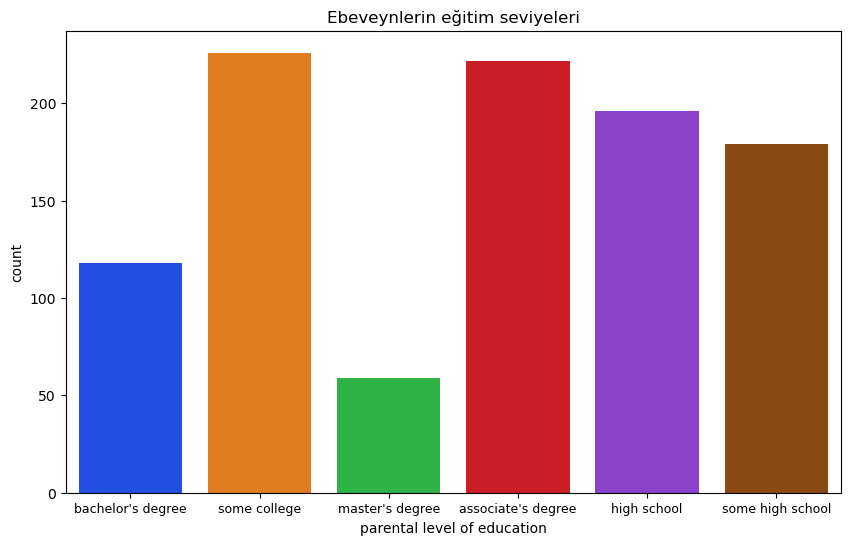

In [254]:
plt.figure(figsize=(10, 6))
p = sns.countplot(x="parental level of education",data = df, palette="bright")
plt.xticks(rotation=0,fontsize=9)
plt.title("Ebeveynlerin eğitim seviyeleri")
plt.show()

In [177]:
df["Grade"].value_counts() # üstteki grafiğin verileri

B    261
C    255
A    198
F    166
D    116
E      4
Name: Grade, dtype: int64

In [152]:
df["parental level of education"].value_counts() # bu veriyi görselleştirdik üstte

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

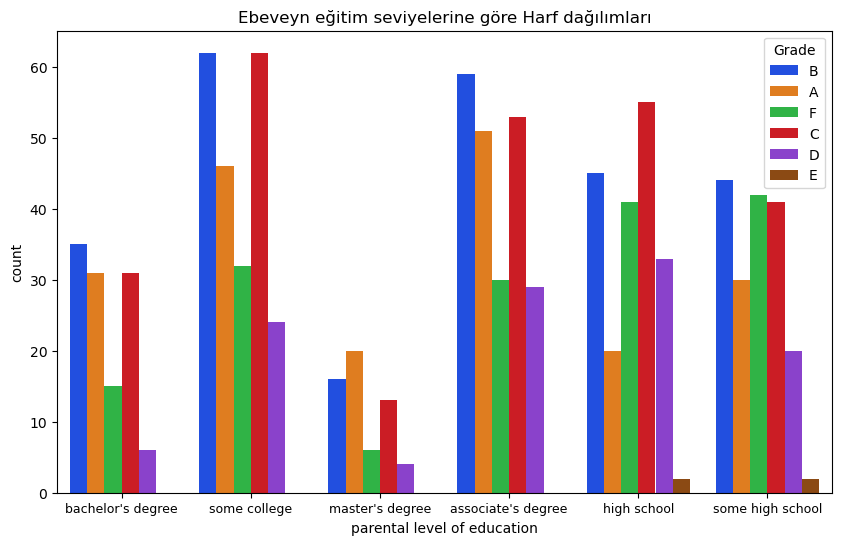

In [164]:
plt.figure(figsize=(10, 6))
p = sns.countplot(x="parental level of education",data = df,hue="Grade", palette="bright")
plt.xticks(rotation=0,fontsize=9)
plt.title("Ebeveyn eğitim seviyelerine göre Harf dağılımları")
plt.show()

In [212]:
df[(df["parental level of education"] == "high school")].count().iloc[0] 
#high school toplam bulma

196

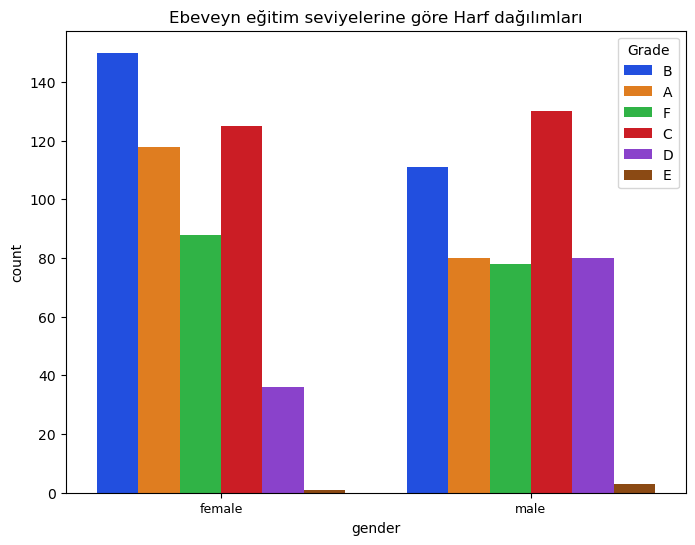

In [167]:
plt.figure(figsize=(8, 6))
p = sns.countplot(x="gender",data = df,hue="Grade", palette="bright")
plt.xticks(rotation=0,fontsize=9)
plt.title("Ebeveyn eğitim seviyelerine göre Harf dağılımları")
plt.show()

In [186]:
df["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [205]:
df[(df["gender"] == "female") & (df["Grade"] == "D")].count().iloc[0] 
#Cinsiyeti kadın olan ve harf notu D olanların sayısını bulma

36

In [228]:
#Kız Erkek yüzdesi bulma
df_gender = df["gender"]
female_count = df_gender.value_counts()["female"]
male_count = df_gender.value_counts()["male"]
female_ratio = female_count/(female_count + male_count) * 100
male_ratio = male_count/(female_count + male_count) * 100

In [227]:
print("Kız sayısı oranı",female_ratio.round(2))
print("Erkek sayısı oranı",male_ratio.round(2))

Kız sayısı oranı 51.8
Erkek sayısı oranı 48.2


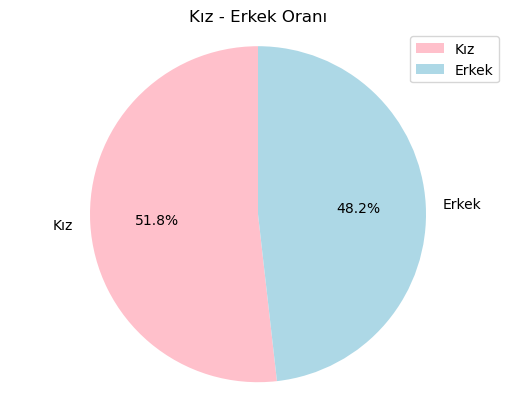

In [252]:
labels = ["Kız","Erkek"]
sizes = [female_ratio,male_ratio]
colors = ["pink","lightblue"]
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%",startangle=90)
plt.legend()
plt.title("Kız - Erkek Oranı")
plt.axis("equal")
plt.show()

In [264]:
df_female = df[df["gender"] == "female"]
df_male = df[df["gender"] == "male"]
female_math_mean = df_female["math score"].mean()
male_math_mean = df_male["math score"].mean()

female_to_male_math_ratio = female_math_mean/male_math_mean

print("Kızların erkeklere oranı:", female_to_male_math_ratio.round(4))

Kızların erkeklere oranı: 0.9259


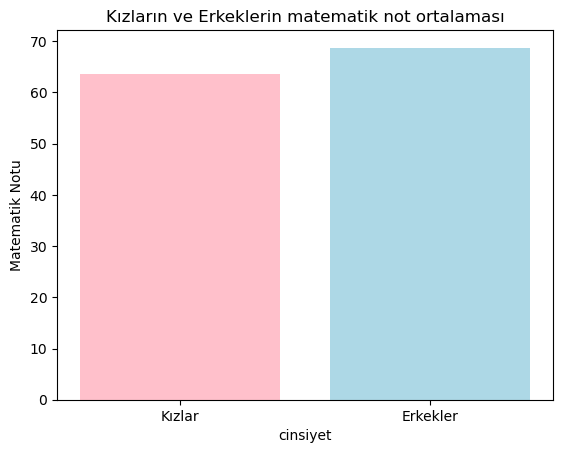

In [292]:
labels = ["Kızlar","Erkekler"]
values = [female_math_mean,male_math_mean]
colors = ["pink","lightblue"]
plt.bar(labels,values,color = colors)
plt.title("Kızların ve Erkeklerin matematik not ortalaması")
plt.xlabel("cinsiyet")
plt.ylabel("Matematik Notu")

plt.show()

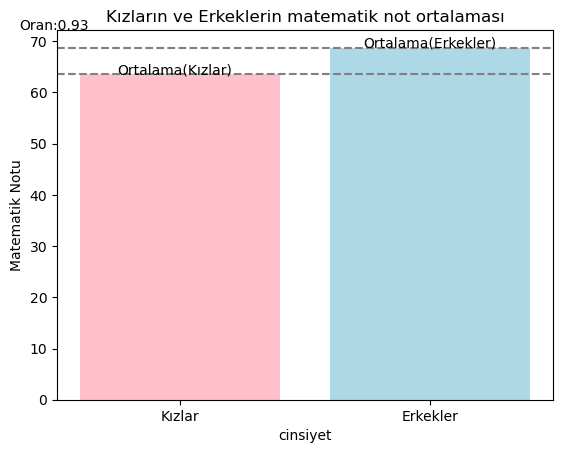

In [345]:
labels = ["Kızlar","Erkekler"]
values = [female_math_mean,male_math_mean]
colors = ["pink","lightblue"]
plt.bar(labels,values,color = colors)

plt.axhline(y=male_math_mean,color="gray",linestyle="--")
plt.text(1,male_math_mean,"Ortalama(Erkekler)",ha="center")
plt.axhline(y=female_math_mean,color="gray",linestyle="--")
plt.text(-0.25,female_math_mean,"Ortalama(Kızlar)",ha="left")
plt.text(-0.5,male_math_mean*1.05,"Oran:{:.2f}".format(female_to_male_math_ratio),ha="center")



plt.title("Kızların ve Erkeklerin matematik not ortalaması")
plt.xlabel("cinsiyet")
plt.ylabel("Matematik Notu")
plt.show()

In [404]:
df[(df["Grade"] == "F") & (df["math score"] >= 50) & (df["reading score"] >= 50) & (df["writing score"] >= 50)] 

# herhangi bir deresten 50 altında alanların overall scoreru F olur

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,Overall_PassStatus,Total_Marks,Grade


In [387]:
df[(df["Grade"] == "C") & (df["Total_Marks"] == 62)].iloc[0:3] #burada 62 ile C alınmış

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,Overall_PassStatus,Total_Marks,Grade
279,male,group B,bachelor's degree,free/reduced,none,73,56,57,P,P,P,P,62.0,C
350,female,group B,bachelor's degree,standard,none,52,65,69,P,P,P,P,62.0,C
494,female,group B,high school,standard,none,54,64,68,P,P,P,P,62.0,C


In [402]:
df[(df["Grade"] == "F") & (df["Total_Marks"] >= 60)]
#kodun hatalı kısmı burası total marks 62 fakat grade F sebebide math score 45 olması

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,Overall_PassStatus,Total_Marks,Grade
371,female,group C,some college,free/reduced,completed,45,73,70,F,P,P,F,62.67,F


In [405]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,Overall_PassStatus,Total_Marks,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,72.67,B
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,82.33,A
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,92.67,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,P,F,F,49.33,F
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,76.33,B


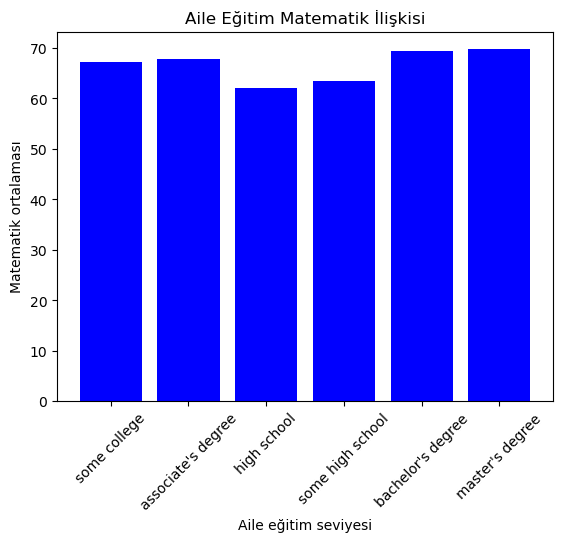

In [413]:
parental_edu_counts = df["parental level of education"].value_counts()

parental_edu_levels = parental_edu_counts.index.tolist()

math_score = []
for level in parental_edu_levels:
    math_score.append(df[df["parental level of education"] == level]["math score"].mean())
    
plt.bar(parental_edu_levels,math_score, color="blue")
plt.xlabel("Aile eğitim seviyesi")
plt.ylabel("Matematik ortalaması")
plt.title("Aile Eğitim Matematik İlişkisi")
plt.xticks(rotation = 45)
plt.show()

In [454]:
df[df["parental level of education"] == "high school"]["math score"].mean() 
#bu kod aile eğitimi highschool olan çocukların matematik ortalamasını gösteriyor

62.13775510204081

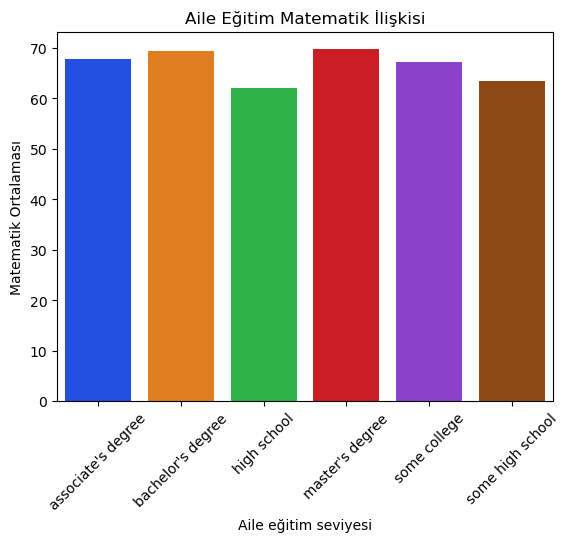

In [448]:
# Aile eğitim seviyelerine göre gruplayıp matematik puanlarının ortalamasını al
parental_edu_math_mean = df.groupby("parental level of education")["math score"].mean().reset_index()

# Barplot çizimi
sns.barplot(x="parental level of education", y="math score", data=parental_edu_math_mean, palette="bright")
plt.xticks(rotation=45)
plt.xlabel("Aile eğitim seviyesi")
plt.ylabel("Matematik Ortalaması")
plt.title("Aile Eğitim Matematik İlişkisi")
plt.show()

In [447]:
#buradan değerleri karşılaştırabiliriz
parental_edu_math_mean = df.groupby("parental level of education")["math score"].mean().reset_index()
parental_edu_math_mean

,parental level of education,math score
0,associate's degree,67.882883
1,bachelor's degree,69.389831
2,high school,62.137755
3,master's degree,69.745763
4,some college,67.128319
5,some high school,63.497207


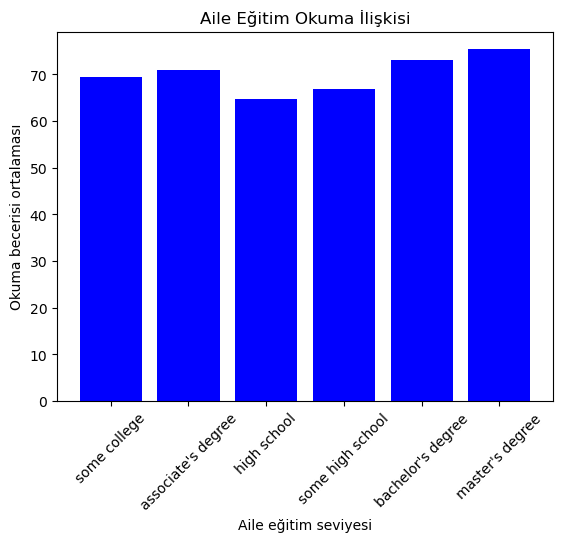

In [455]:
parental_edu_counts = df["parental level of education"].value_counts()

parental_edu_levels = parental_edu_counts.index.tolist()

reading_score = []
for level in parental_edu_levels:
    reading_score.append(df[df["parental level of education"] == level]["reading score"].mean())
    
plt.bar(parental_edu_levels,reading_score, color="blue")
plt.xlabel("Aile eğitim seviyesi")
plt.ylabel("Okuma becerisi ortalaması")
plt.title("Aile Eğitim Okuma İlişkisi")
plt.xticks(rotation = 45)
plt.show()

In [458]:
df[df["parental level of education"] == "high school"]["reading score"].mean() 
#bu kod aile eğitimi highschool olan çocukların okuma ortalamasını gösteriyor

64.70408163265306

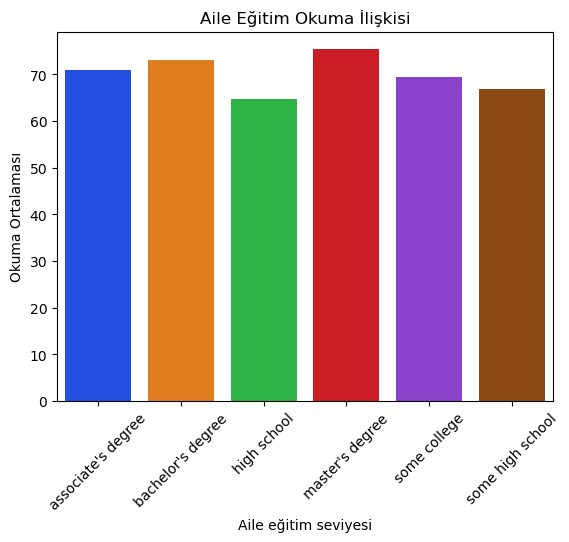

In [462]:
# Aile eğitim seviyelerine göre gruplayıp matematik puanlarının ortalamasını al
parental_edu_reading_mean = df.groupby("parental level of education")["reading score"].mean().reset_index()

# Barplot çizimi
sns.barplot(x="parental level of education", y="reading score", data=parental_edu_reading_mean, palette="bright")
plt.xticks(rotation=45)
plt.xlabel("Aile eğitim seviyesi")
plt.ylabel("Okuma Ortalaması")
plt.title("Aile Eğitim Okuma İlişkisi")
plt.show()

In [463]:
parental_edu_reading_mean = df.groupby("parental level of education")["reading score"].mean().reset_index()
parental_edu_reading_mean  #grafikteki değerlerin sayısal karşılığı

,parental level of education,reading score
0,associate's degree,70.927928
1,bachelor's degree,73.000000
2,high school,64.704082
3,master's degree,75.372881
4,some college,69.460177
5,some high school,66.938547


#### Group A : Siyahiler
#### Group B : Koyu Tenliler
#### Group C : Beyazlar
#### Group D : Asyalılar
#### Group E : ABD Yerlisi

In [464]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,Overall_PassStatus,Total_Marks,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,72.67,B
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,82.33,A


In [470]:
ethnic = df.groupby("race/ethnicity")["math score"].mean().reset_index()
ethnic

,race/ethnicity,math score
0,group A,61.629213
1,group B,63.452632
2,group C,64.463950
3,group D,67.362595
4,group E,73.821429


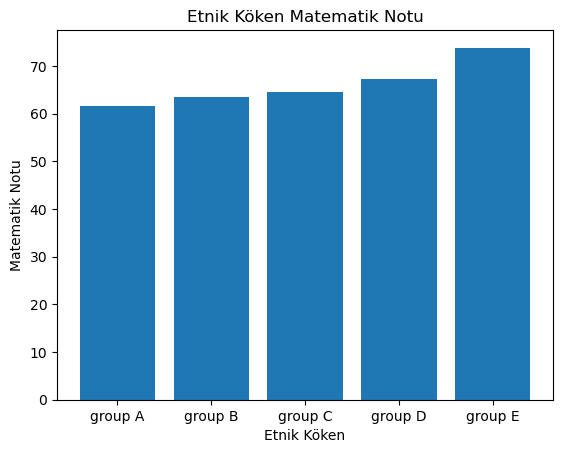

In [474]:
plt.bar(ethnic["race/ethnicity"], ethnic["math score"])
plt.title("Etnik Köken Matematik Notu")
plt.xlabel("Etnik Köken")
plt.ylabel("Matematik Notu")
plt.show()

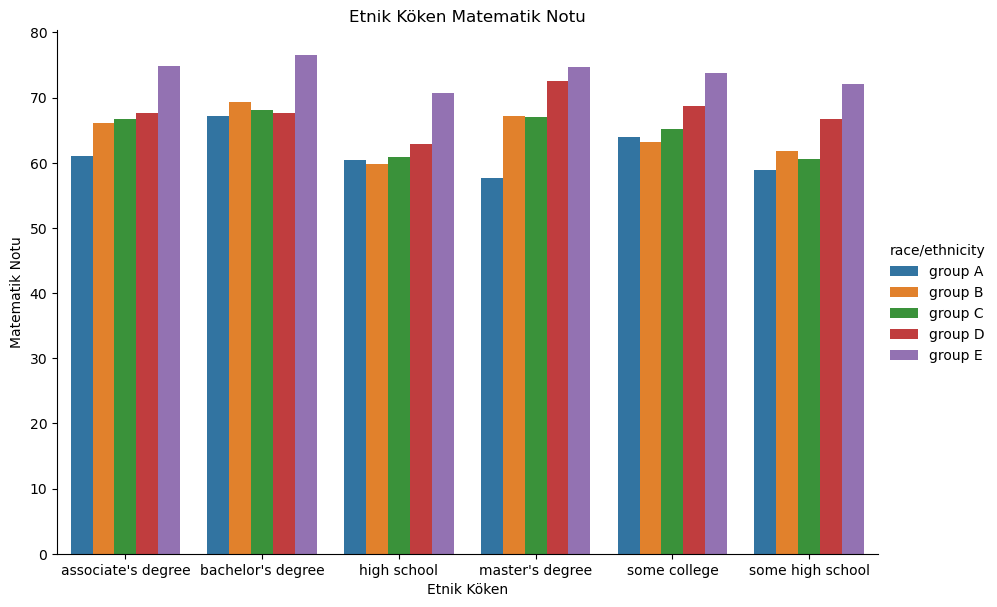

In [509]:
ethnic = df.groupby(["race/ethnicity","parental level of education"])["math score"].mean().reset_index()

sns.catplot(x="parental level of education",y="math score",hue="race/ethnicity",kind="bar",data=ethnic,height=6,aspect=1.5)
plt.title("Etnik Köken Matematik Notu")
plt.xlabel("Etnik Köken")
plt.ylabel("Matematik Notu")
plt.show()

In [510]:
ethnic = df.groupby(["race/ethnicity","parental level of education"])["math score"].mean().reset_index()
ethnic.iloc[0:5] #grafikteki tüm verileri görmek

,race/ethnicity,parental level of education,math score
0,group A,associate's degree,61.000000
1,group A,bachelor's degree,67.166667
2,group A,high school,60.444444
3,group A,master's degree,57.666667
4,group A,some college,63.888889


In [500]:
ethnic[(ethnic["race/ethnicity"] == "group E")]  #sadece E grubunu çağırmak

,race/ethnicity,parental level of education,math score
24,group E,associate's degree,74.897436
25,group E,bachelor's degree,76.555556
26,group E,high school,70.772727
27,group E,master's degree,74.625000
28,group E,some college,73.828571
29,group E,some high school,72.111111


In [511]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,Overall_PassStatus,Total_Marks,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,72.67,B
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,82.33,A
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,92.67,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,P,F,F,49.33,F
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,76.33,B


In [531]:
grup = df.groupby("test preparation course")["math score"].mean().reset_index()
grup

,test preparation course,math score
0,completed,69.695531
1,none,64.077882


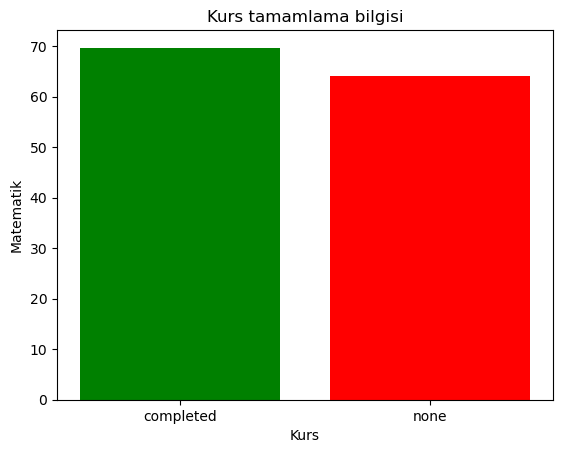

In [533]:
grupp = df.groupby("test preparation course")["math score"].mean()
plt.bar(grupp.index,grupp.values, color=["green","Red"])
plt.title("Kurs tamamlama bilgisi")
plt.xlabel("Kurs")
plt.ylabel("Matematik")
plt.show()